In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/presion_cardiaca.csv')

In [4]:
df.head(10)

,Fecha de medición,Zona horaria,SYS,DIA,Pulso,Nombre del modelo de dispositivo
0,2024-07-03 20:44,America/Mexico_City,126,79,111,HEM-7120_LA
1,2024-07-03 22:42,America/Mexico_City,122,79,92,HEM-7120_LA
2,2024-07-04 8:34,America/Mexico_City,113,74,87,HEM-7120_LA
3,2024-07-05 1:38,America/Mexico_City,113,78,83,HEM-7120_LA
4,2024-07-05 8:38,America/Mexico_City,120,78,88,HEM-7120_LA
5,2024-07-06 1:08,America/Mexico_City,125,84,85,HEM-7120_LA
6,2024-07-06 12:21,America/Mexico_City,120,70,81,HEM-7120_LA
7,2024-07-06 15:27,America/Mexico_City,120,75,114,HEM-7120_LA
8,2024-07-06 22:59,America/Mexico_City,114,72,97,HEM-7120_LA
9,2024-07-07 10:24,America/Mexico_City,125,80,88,HEM-7120_LA


In [5]:
df['Fecha de medición'] = pd.to_datetime(df['Fecha de medición'])

In [6]:
data = df.copy()

In [7]:
data.set_index('Fecha de medición', inplace=True)

In [8]:
data.head(3)

,Zona horaria,SYS,DIA,Pulso,Nombre del modelo de dispositivo
Fecha de medición,,,,,
2024-07-03 20:44:00,America/Mexico_City,126,79,111,HEM-7120_LA
2024-07-03 22:42:00,America/Mexico_City,122,79,92,HEM-7120_LA
2024-07-04 08:34:00,America/Mexico_City,113,74,87,HEM-7120_LA


In [9]:
data.describe()

,SYS,DIA,Pulso
count,98.000000,98.000000,98.000000
mean,118.704082,78.285714,86.571429
std,6.328155,5.066567,11.264395
min,100.000000,67.000000,65.000000
25%,115.000000,75.000000,80.000000
50%,120.000000,78.000000,85.000000
75%,123.000000,82.000000,92.000000
max,131.000000,89.000000,115.000000


Las medias para los valores de presión SYS, DIA y Pulso son 118.70, 78.28 y 86.57 respectivamente.

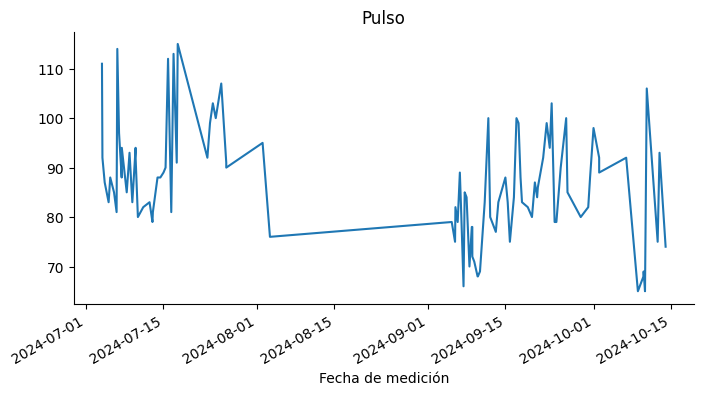

In [10]:

from matplotlib import pyplot as plt
data['Pulso'].plot(kind='line', figsize=(8, 4), title='Pulso')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
data.isnull().sum()

,0
Zona horaria,0
SYS,0
DIA,0
Pulso,0
Nombre del modelo de dispositivo,0


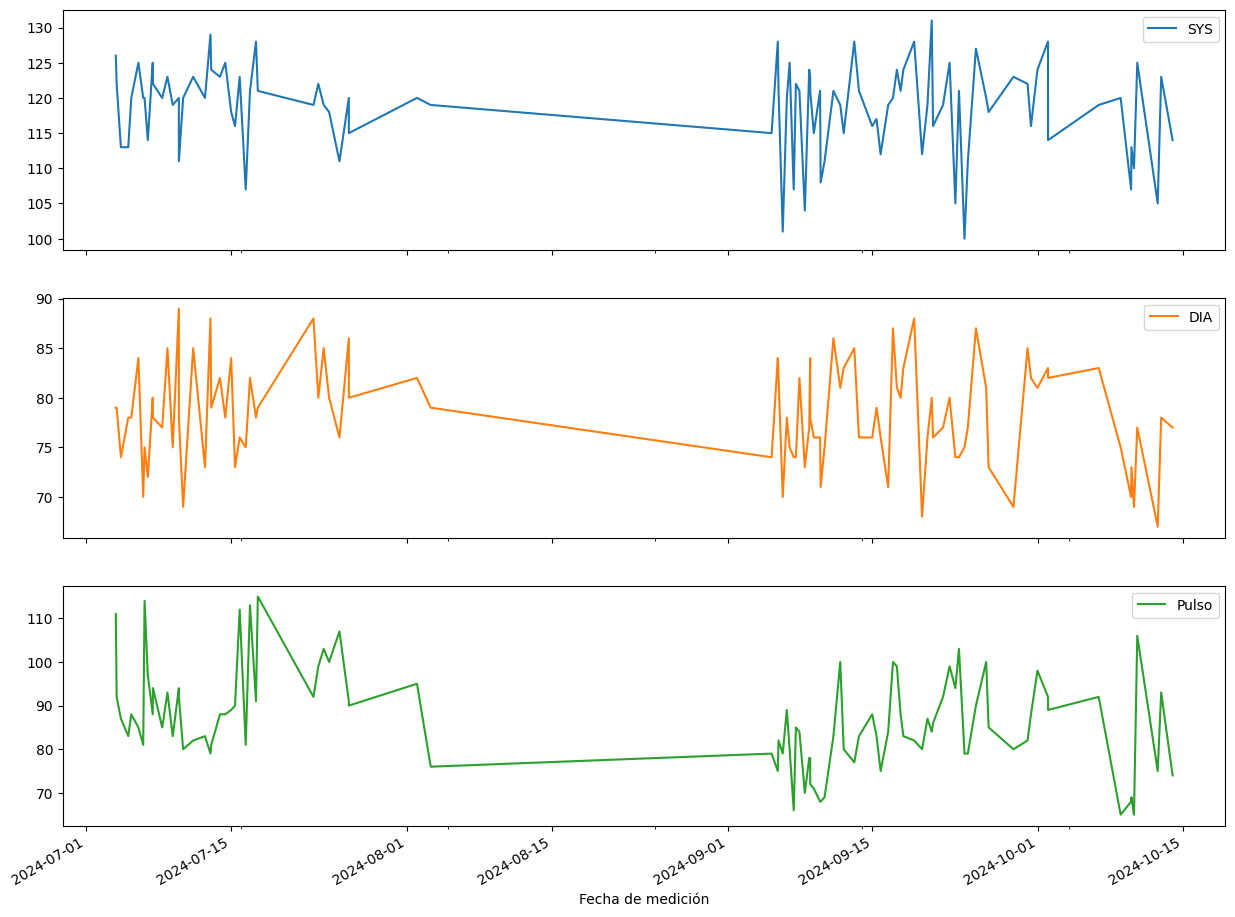

In [12]:
data.plot(subplots=True, figsize=(15, 12))
plt.show()

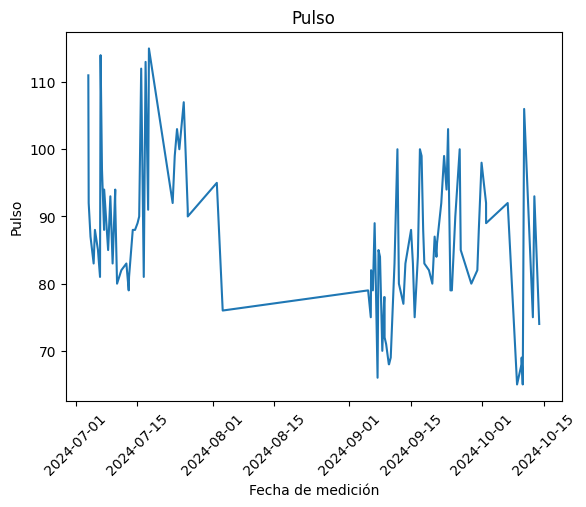

In [13]:
sns.lineplot(x='Fecha de medición', y='Pulso', data=data)
plt.title('Pulso')
plt.xticks(rotation = 45)
plt.show()

In [14]:
data_melt = pd.melt(data.reset_index(), id_vars='Fecha de medición', value_vars=['SYS', 'DIA', 'Pulso'], value_name='Variable', var_name='Valor')

In [15]:
data_melt['Variable'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: Variable
Non-Null Count  Dtype
--------------  -----
294 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


In [16]:
unique_variables = data_melt['Variable'].unique()
print(f"The unique types in the 'Variable' column are: {unique_variables}")

The unique types in the 'Variable' column are: [126 122 113 120 125 114 123 119 111 129 124 118 116 107 121 128 115 101
 104 108 117 112 131 105 100 127 110  79  74  78  84  70  75  72  80  77
  85  89  69  73  88  82  76  86  71  81  83  87  68  67  92  97  94  93
  90  91  99 103  95  66  98  65 106]


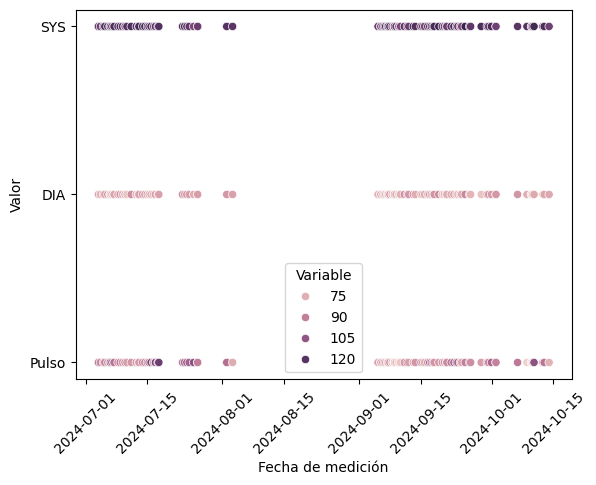

In [17]:
sns.scatterplot(x="Fecha de medición", y="Valor", hue="Variable", data=data_melt)
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-15762b555897>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variable", y = "Valor", data=data_melt, palette = "Set2")


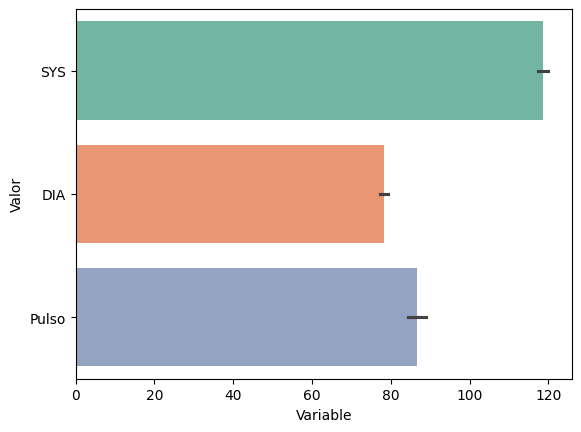

In [18]:
sns.barplot(x="Variable", y = "Valor", data=data_melt, palette = "Set2")
plt.show()

<ipython-input-19-53dd6d597fd1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variable", y="Valor", data=data_melt, palette="Set1")


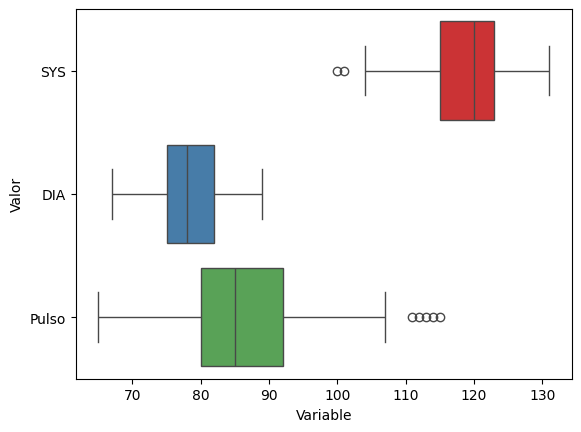

In [19]:
sns.boxplot(x="Variable", y="Valor", data=data_melt, palette="Set1")
plt.show()

Podemos Observar que existen valores atipicos en especial para Pulso.

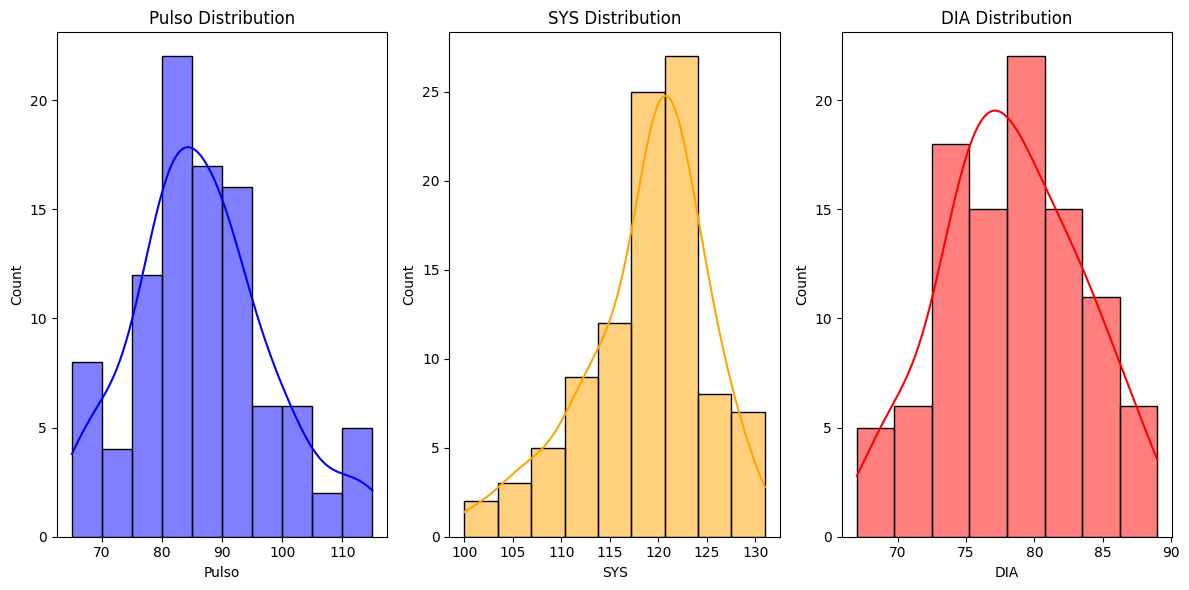

In [20]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Pulso'], kde=True, color = 'blue')
plt.title('Pulso Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['SYS'], kde=True, color= 'orange')
plt.title('SYS Distribution')

plt.subplot(1, 3, 3)
# Assuming 'DIA' is another relevant column
sns.histplot(df['DIA'], kde=True, color = 'red')
plt.title('DIA Distribution')


plt.tight_layout()
plt.show()

Observaciones:

*  En la distribución podemos observar que tanto el Pulso y la presión Diatolica presentan una distribución casi normal.
*   En cuanto a la presón Sistolica podemo observar una tendencia hacia la izquierda.



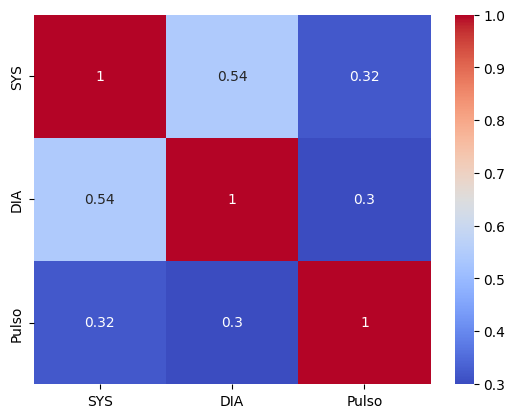

In [21]:
corr = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')



*   Podemos observar una correlación positiva leve entre las presiones SYS, DIA Y Pulso.



# Implementacion de modelo ARIMA usando pmdarina y auto_arima.

In [22]:
#Instalción con autoarima
!pip install pmdarima

In [23]:
#Bibliotecas para usar Auto_arima
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

In [24]:

data.head(3)

,Zona horaria,SYS,DIA,Pulso,Nombre del modelo de dispositivo
Fecha de medición,,,,,
2024-07-03 20:44:00,America/Mexico_City,126,79,111,HEM-7120_LA
2024-07-03 22:42:00,America/Mexico_City,122,79,92,HEM-7120_LA
2024-07-04 08:34:00,America/Mexico_City,113,74,87,HEM-7120_LA


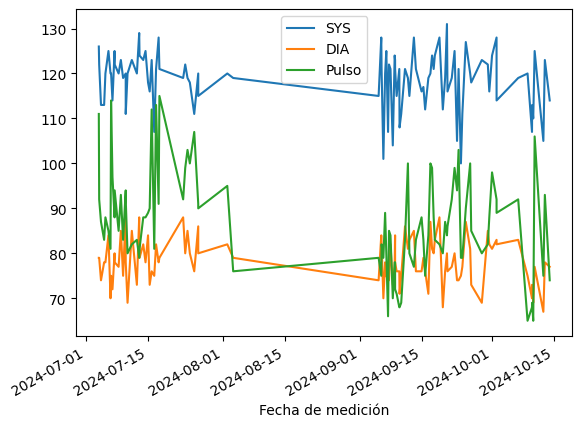

In [25]:
data.plot()
plt.show()

In [26]:
#Preparación de la data para Pulso.
data_Pulso = data['Pulso']

In [27]:

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data_Pulso)

(0.21287661924608584, True)

La prueba nos confirma la estacionalidad.

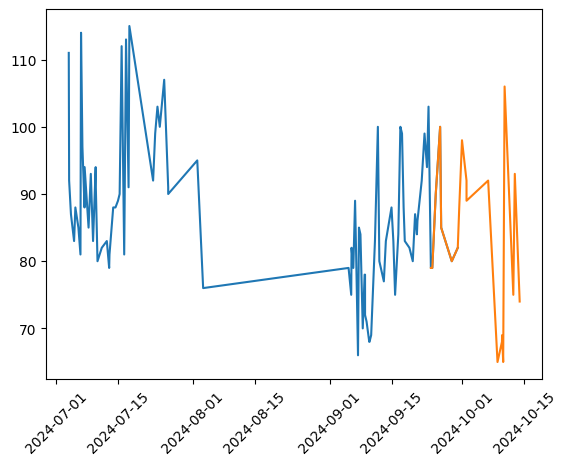

In [28]:
#Preparando los datos para la implementación:
train = data_Pulso[:85]
test = data_Pulso[-20:]

#Grafica de los conjuntos de Prueba y Entrenamiento.
plt.plot(train)
plt.plot(test)
plt.xticks(rotation=45)
plt.show()

In [29]:
#Uso de auto_arima para encontrar los mejores parametros para el modelo.

arima_model = auto_arima(train, start_p = 0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=609.672, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=579.250, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=601.506, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=573.234, Time=1.98 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=573.735, Time=4.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=573.763, Time=5.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=572.343, Time=0.83 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.27 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=573.106, Time=4.73 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=571.532, Time=1.95 sec
 ARIMA(1,1,0)(0,1,3)[12]             : AIC=573.203, Time=6.33 sec
 ARIMA(1,1,0)(1,1,3)[12]             : AIC=inf, Time=5.28 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=570.47

In [30]:
model_fit = arima_model.fit(train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


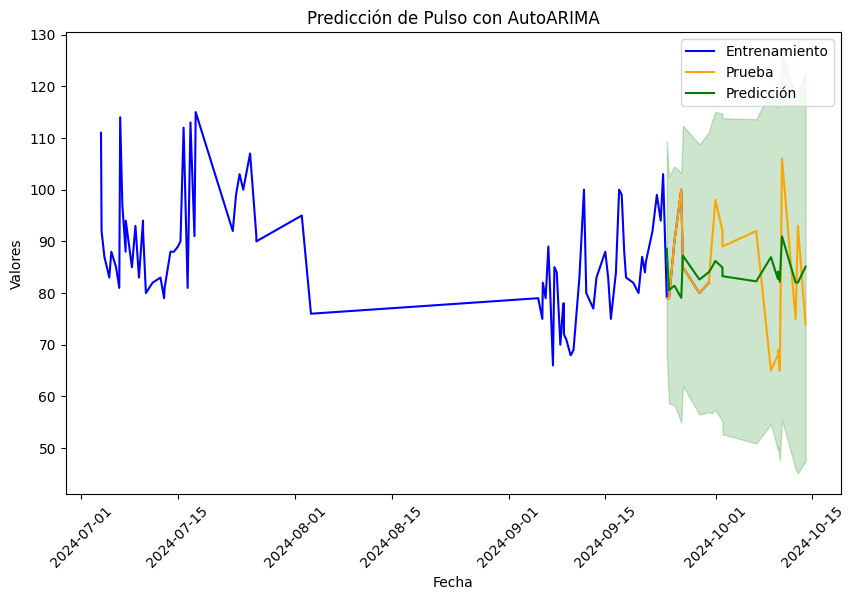

Error cuadrático medio (RMSE): 11.601422578036336


In [31]:

n_periods = len(test)
forecast, conf_int = model_fit.predict(n_periods=n_periods, return_conf_int=True)

# Crear índice de fechas para predicciones
forecast_index = test.index

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train, label="Entrenamiento", color="blue")
plt.plot(test, label="Prueba", color="orange")
plt.plot(forecast_index, forecast, label="Predicción", color="green")

# Intervalos de confianza
plt.fill_between(forecast_index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='green', alpha=0.2)

plt.title("Predicción de Pulso con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calcular el error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio (RMSE): {rmse}")

- El RMSE de 11.60 significa que las predicciones del modelo para el Pulso, en promedio estan desviadas en aproximadamente 11.60 latidos por minuto (BPM).



# Modelo para Presión Diastólica.

In [32]:
#Preparación de los Datos
data_Dia = data['DIA']

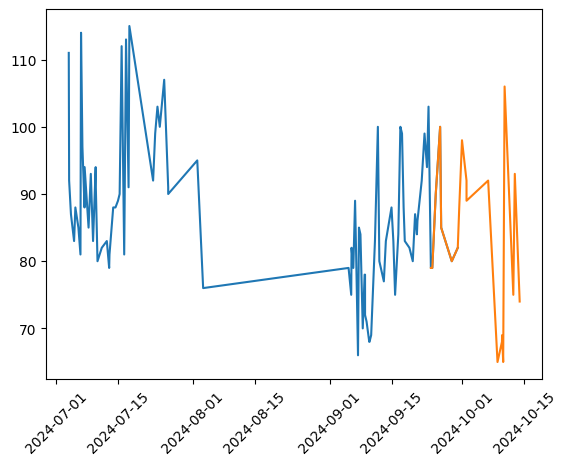

In [33]:
train_dia = data_Dia[:85]
test_dia = data_Dia[-20:]

#Grafica de los conjuntos de Prueba y Entrenamiento.
plt.plot(train)
plt.plot(test)
plt.xticks(rotation=45)
plt.show()


In [34]:
Dia_model = auto_arima(train_dia, start_p = 0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=541.536, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=503.202, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=516.090, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=495.254, Time=0.29 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=495.701, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=494.947, Time=1.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.76 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=496.885, Time=0.90 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=4.39 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=5.97 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=489.121, Time=0.90 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=488.203, Time=

In [35]:
model_fit_dia = Dia_model.fit(train_dia)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


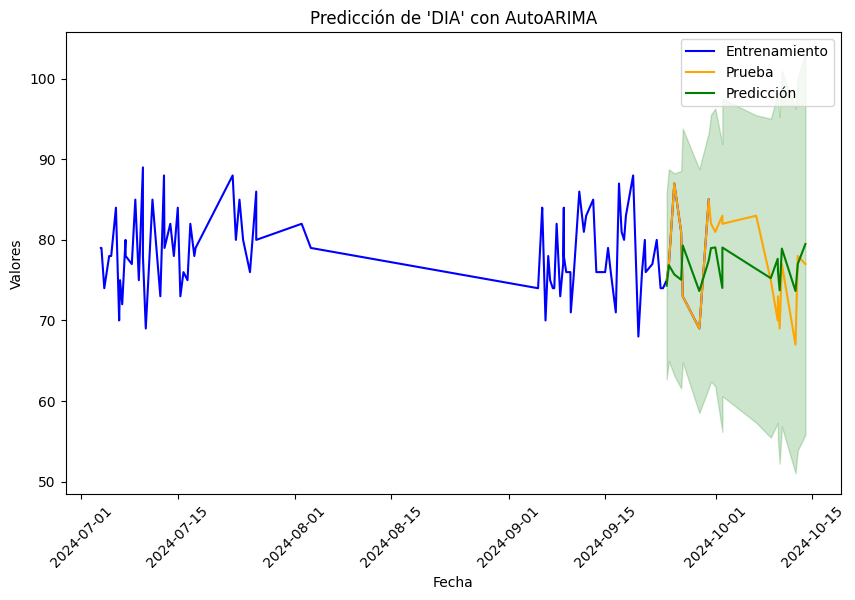

Error cuadrático medio (RMSE): 5.3543180740004255


In [36]:
m_periods = len(test_dia)
forecast_dia, conf_int_dia = model_fit_dia.predict(n_periods=m_periods, return_conf_int=True) # Use m_periods, not n_periods
forecast_index_dia = test_dia.index # Use test_dia.index, not test.index


# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train_dia, label="Entrenamiento", color="blue")
plt.plot(test_dia, label="Prueba", color="orange")
plt.plot(forecast_index_dia, forecast_dia, label="Predicción", color="green")

# Intervalos de confianza
plt.fill_between(forecast_index_dia,
                 conf_int_dia[:, 0],  # Use conf_int_dia, not conf_int
                 conf_int_dia[:, 1],  # Use conf_int_dia, not conf_int
                 color='green', alpha=0.2)

plt.title("Predicción de 'DIA' con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calcular el error
mse = mean_squared_error(test_dia, forecast_dia)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio (RMSE): {rmse}")

- El RMSE de 5.35 significa que las predicciones del modelo para el Pulso, en promedio estan desviadas en aproximadamente 5.35.

## Prediccion para Restante de Octubre y todo Noviembre.

In [37]:
noviembre = pd.date_range(start='2024-10-16', end='2024-11-30')

In [38]:
noviembre_df = pd.DataFrame(index=noviembre, columns = ['Predicciones'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


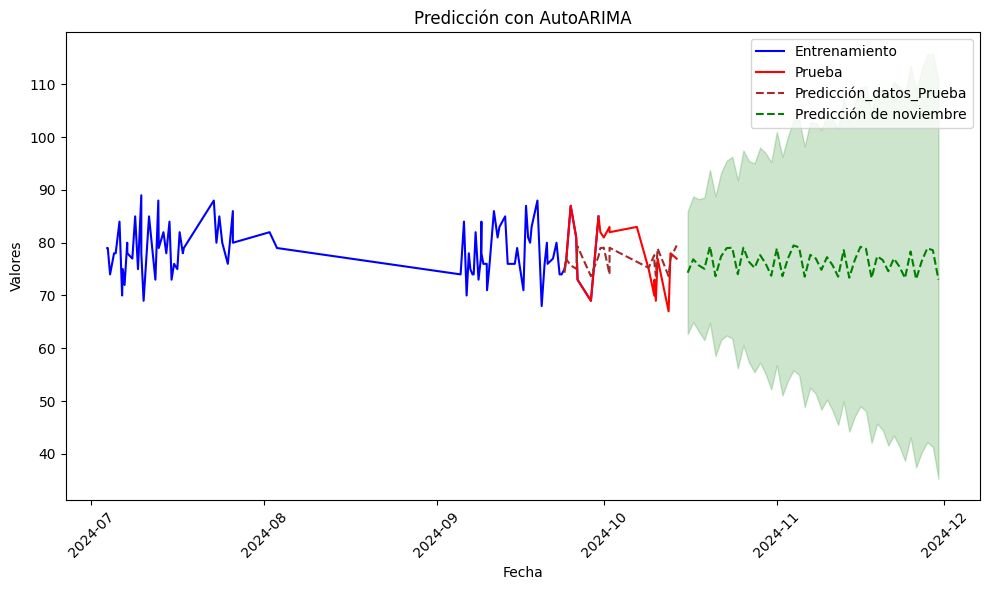

In [39]:
n_periods = len(noviembre_df)

forecast_noviembre, conf_int_noviembre = model_fit_dia.predict(n_periods=n_periods, return_conf_int=True)
forecast_index_noviembre = noviembre_df.index



plt.figure(figsize=(10, 6))
plt.plot(train_dia, label="Entrenamiento", color="blue")
plt.plot(test_dia, label="Prueba", color="red")
plt.plot(forecast_index_dia, forecast_dia, label="Predicción_datos_Prueba", color="brown", linestyle = '--')
plt.plot(forecast_index_noviembre, forecast_noviembre, label="Predicción de noviembre", color="green", linestyle = '--' )

plt.fill_between(forecast_index_noviembre,
                 conf_int_noviembre[:len(forecast_index_noviembre),0],  # Use conf_int_dia, not conf_int
                 conf_int_noviembre[:len(forecast_index_noviembre), 1],  # Use conf_int_dia, not conf_int
                 color='green', alpha=0.2)

plt.title("Predicción con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


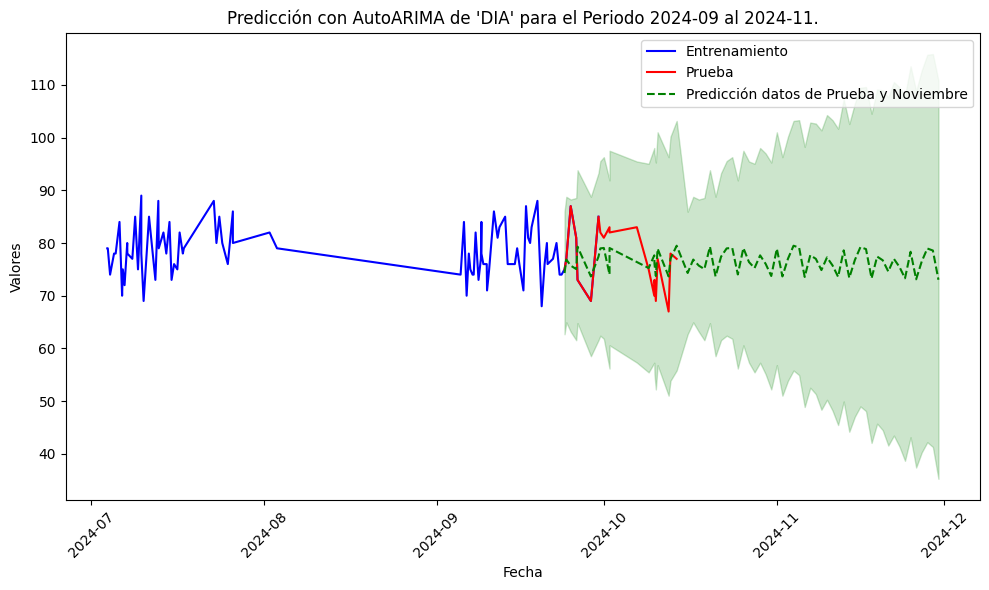

In [40]:
combined_forecast = np.concatenate([forecast_dia, forecast_noviembre])

# Combinacion de los index para conectar la linea:
combined_index = forecast_index_dia.union(forecast_index_noviembre)

# Create a new conf_int for the combined index
combined_conf_int = np.zeros((len(combined_index), 2))
combined_conf_int[:len(forecast_index_dia)] = conf_int_dia
combined_conf_int[len(forecast_index_dia):] = conf_int_noviembre

plt.figure(figsize=(10, 6))
plt.plot(train_dia, label="Entrenamiento", color="blue")
plt.plot(test_dia, label="Prueba", color="red")

plt.plot(combined_index[:len(combined_forecast)], combined_forecast, label="Predicción datos de Prueba y Noviembre", color="Green", linestyle = '--')


plt.fill_between(combined_index,
                 combined_conf_int[:len(combined_index),0],
                 combined_conf_int[:len(combined_index), 1],
                 color='green', alpha=0.2)
#plt.subplot( ) # This line is redundant, remove it

plt.title("Predicción con AutoARIMA de 'DIA' para el Periodo 2024-09 al 2024-11.")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

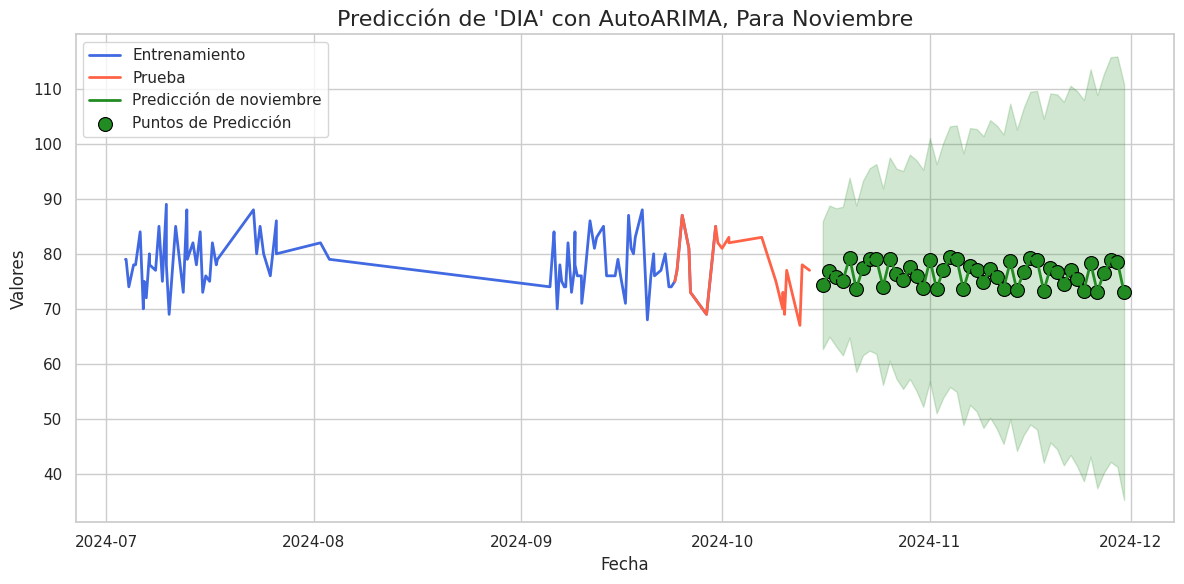

In [41]:
# Graficando con Seaborn.

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Graficar los datos de entrenamiento y prueba con líneas suaves
sns.lineplot(x=train_dia.index, y=train_dia, label="Entrenamiento", color="royalblue", linewidth=2)
sns.lineplot(x=test_dia.index, y=test_dia, label="Prueba", color="tomato", linewidth=2)

# Graficar la predicción de noviembre como una línea suave
sns.lineplot(x=forecast_index_noviembre, y=forecast_noviembre, label="Predicción de noviembre", color="forestgreen", linewidth=2)

# Rellenar el área de confianza para la predicción
plt.fill_between(forecast_index_noviembre,
                 conf_int_noviembre[:, 0],
                 conf_int_noviembre[:, 1],
                 color="forestgreen", alpha=0.2)

# Resaltar los puntos de predicción con un scatterplot
sns.scatterplot(x=forecast_index_noviembre, y=forecast_noviembre, color="forestgreen", s=100, marker="o", edgecolor="black", label="Puntos de Predicción")

# Mejorar el gráfico con títulos y etiquetas
plt.title("Predicción de 'DIA' con AutoARIMA, Para Noviembre", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Valores", fontsize=12)

# Mostrar la leyenda y ajustar el layout
plt.legend(loc="upper left")


# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

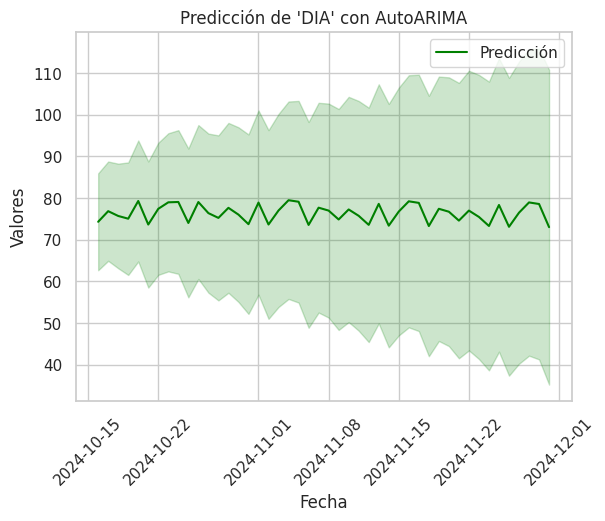

In [42]:
plt.plot(forecast_index_noviembre, forecast_noviembre, label="Predicción", color="green")

plt.fill_between(forecast_index_noviembre,
                 conf_int_noviembre[:, 0],
                 conf_int_noviembre[:, 1],
                 color='green', alpha=0.2)

plt.title("Predicción de 'DIA' con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [43]:
#Conviertiendo el forecast_noviembre en un data frame

forecast_noviembre_df = pd.DataFrame({'Fecha': forecast_index_noviembre, 'Prediccion_DIA': forecast_noviembre})
forecast_noviembre_df.head(3)

,Fecha,Prediccion_DIA
85,2024-10-16,74.313548
86,2024-10-17,76.860168
87,2024-10-18,75.709771


#Auto ARIMA para la Presion Sistolica.

In [44]:
data_SYS = data['SYS']

In [45]:
data_SYS.head(3)

,SYS
Fecha de medición,
2024-07-03 20:44:00,126
2024-07-03 22:42:00,122
2024-07-04 08:34:00,113


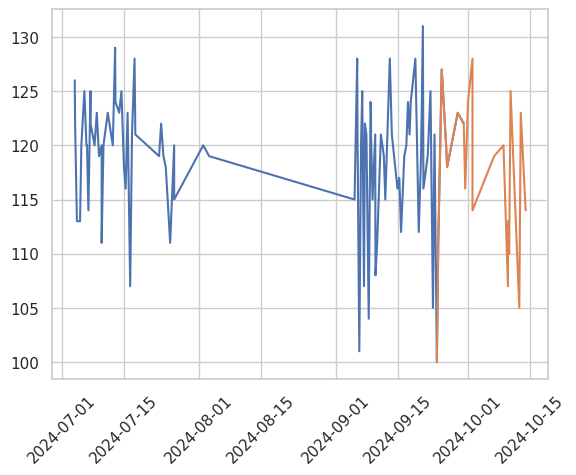

In [46]:
train_sys = data_SYS[:85]
test_sys = data_SYS[-20:]

#Grafica de los conjuntos de Prueba y Entrenamiento.
plt.plot(train_sys)
plt.plot(test_sys)
plt.xticks(rotation=45)
plt.show()

In [47]:
model_sys = auto_arima(train_sys, start_p = 0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=565.869, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=534.712, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=544.572, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=532.310, Time=1.02 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=533.516, Time=1.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=532.283, Time=1.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=530.285, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=528.608, Time=0.16 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=530.292, Time=0.50 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=545.458, Time=0.12 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=505.483, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=526.406, Time=0.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AI

In [48]:
model_fit_sys = model_sys.fit(train_sys)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


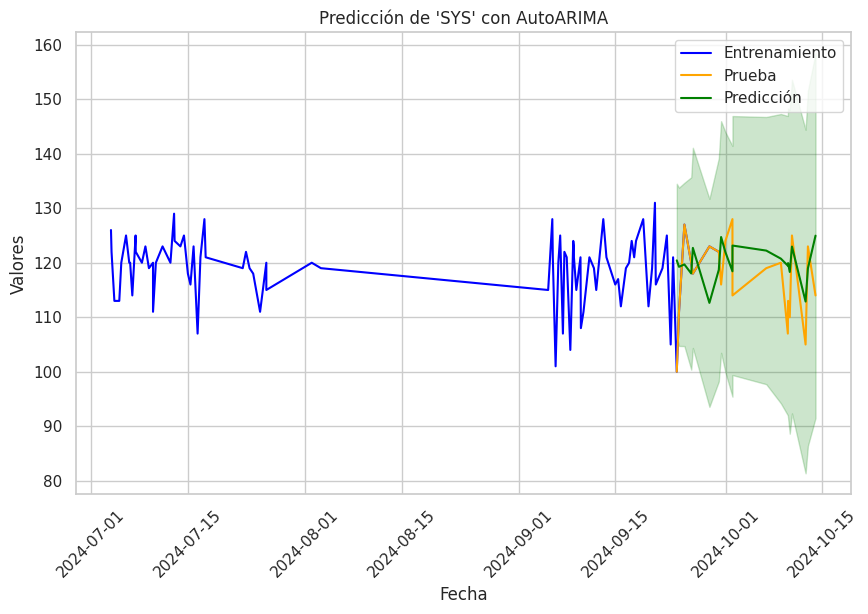

Error cuadrático medio (RMSE): 8.441869821561085


In [49]:
m_periods = len(test_sys)
forecast_sys, conf_int_sys = model_fit_sys.predict(n_periods=m_periods, return_conf_int=True) # Use m_periods, not n_periods
forecast_index_sys = test_sys.index # Use test_dia.index, not test.index


# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train_sys, label="Entrenamiento", color="blue")
plt.plot(test_sys, label="Prueba", color="orange")
plt.plot(forecast_index_sys, forecast_sys, label="Predicción", color="green")

# Intervalos de confianza
plt.fill_between(forecast_index_sys,
                 conf_int_sys[:, 0],  # Use conf_int_dia, not conf_int
                 conf_int_sys[:, 1],  # Use conf_int_dia, not conf_int
                 color='green', alpha=0.2)

plt.title("Predicción de 'SYS' con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calcular el error
mse = mean_squared_error(test_sys, forecast_sys)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio (RMSE): {rmse}")

El RMSE de 8.44 significa que las predicciones de tu modelo para la presión Sistolica, en promedio, se desvian en aproximadamente 8.44.

Predicciones de 'SYS' para Octubre-Noviembre.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


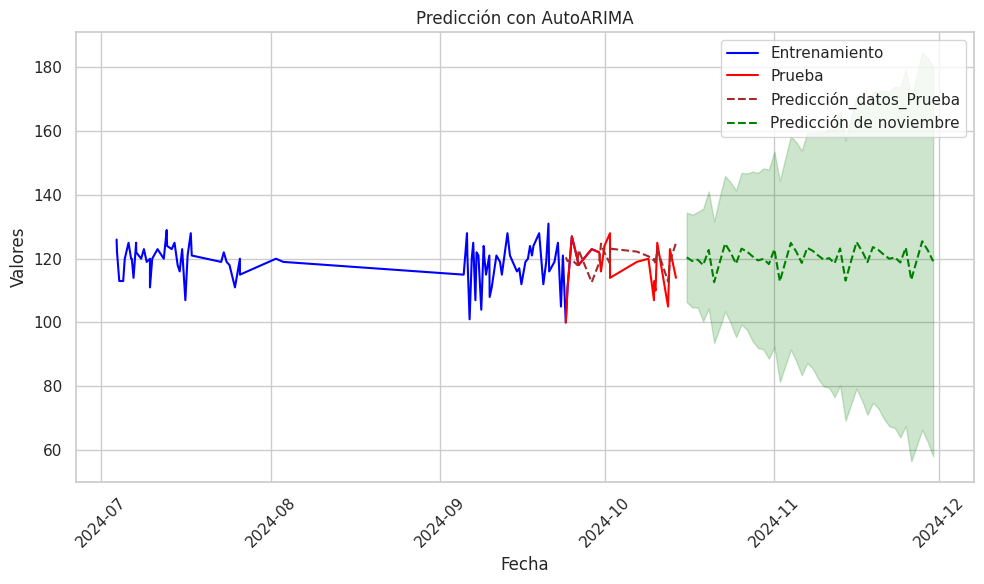

In [50]:
n_periods = len(noviembre_df)

forecast_noviembre_sys, conf_int_noviembre_sys = model_fit_sys.predict(n_periods=n_periods, return_conf_int=True)
forecast_index_noviembre_sys = noviembre_df.index



plt.figure(figsize=(10, 6))
plt.plot(train_sys, label="Entrenamiento", color="blue")
plt.plot(test_sys, label="Prueba", color="red")
plt.plot(forecast_index_sys, forecast_sys, label="Predicción_datos_Prueba", color="brown", linestyle = '--')
plt.plot(forecast_index_noviembre_sys, forecast_noviembre_sys, label="Predicción de noviembre", color="green", linestyle = '--' )

plt.fill_between(forecast_index_noviembre_sys,
                 conf_int_noviembre_sys[:len(forecast_index_noviembre_sys),0],  # Use conf_int_dia, not conf_int
                 conf_int_noviembre_sys[:len(forecast_index_noviembre_sys), 1],  # Use conf_int_dia, not conf_int
                 color='green', alpha=0.2)

plt.title("Predicción con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

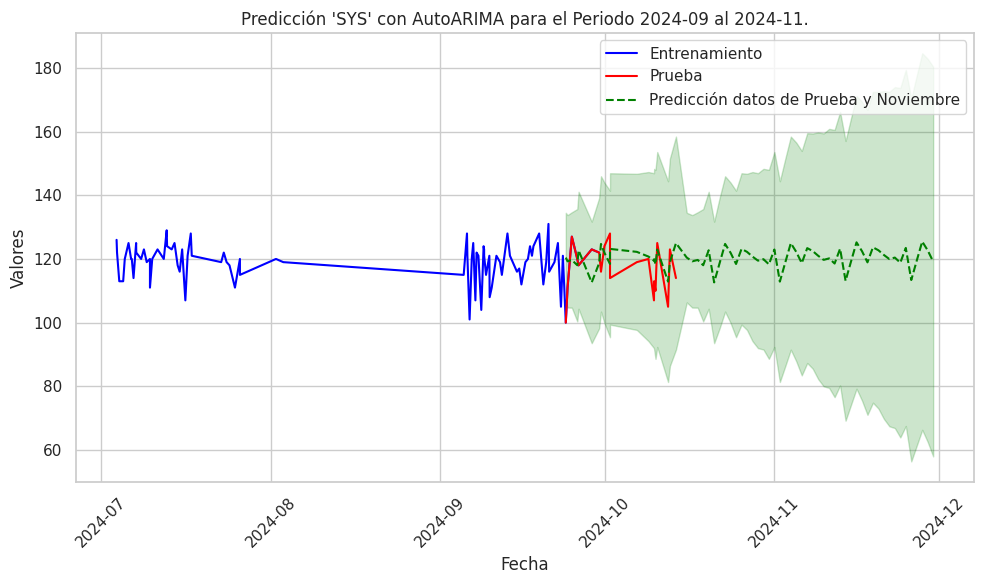

In [51]:
combined_forecast_sys = np.concatenate([forecast_sys, forecast_noviembre_sys])

# Combinacion de los index para conectar la linea:
combined_index_sys = forecast_index_sys.union(forecast_index_noviembre_sys)

# Create a new conf_int for the combined index
combined_conf_int_sys = np.zeros((len(combined_index_sys), 2))
combined_conf_int_sys[:len(forecast_index_sys)] = conf_int_sys
combined_conf_int_sys[len(forecast_index_sys):] = conf_int_noviembre_sys

plt.figure(figsize=(10, 6))
plt.plot(train_sys, label="Entrenamiento", color="blue")
plt.plot(test_sys, label="Prueba", color="red")

plt.plot(combined_index_sys[:len(combined_forecast_sys)], combined_forecast_sys, label="Predicción datos de Prueba y Noviembre", color="Green", linestyle = '--')


plt.fill_between(combined_index_sys,
                 combined_conf_int_sys[:len(combined_index_sys),0],
                 combined_conf_int_sys[:len(combined_index_sys), 1],
                 color='green', alpha=0.2)
#plt.subplot( ) # This line is redundant, remove it

plt.title("Predicción 'SYS' con AutoARIMA para el Periodo 2024-09 al 2024-11.")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

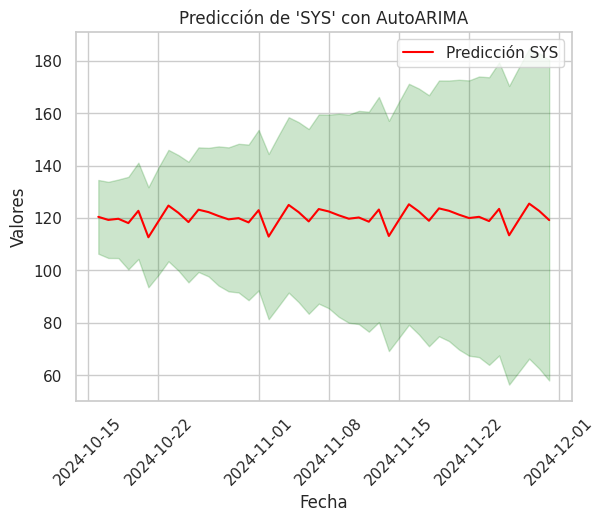

In [52]:
plt.plot(forecast_index_noviembre_sys, forecast_noviembre_sys, label="Predicción SYS", color="red")

plt.fill_between(forecast_index_noviembre_sys,
                 conf_int_noviembre_sys[:, 0],
                 conf_int_noviembre_sys[:, 1],
                 color='green', alpha=0.2)

plt.title("Predicción de 'SYS' con AutoARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
#Creando un data frame de las predicciones para SYS Y DIA.
forecast_noviembre_df['Prediccion_SYS'] = forecast_noviembre_sys

print(forecast_noviembre_df.head())

        Fecha  Prediccion_DIA  Prediccion_SYS
85 2024-10-16       74.313548      120.427373
86 2024-10-17       76.860168      119.252610
87 2024-10-18       75.709771      119.686886
88 2024-10-19       75.054748      118.032463
89 2024-10-20       79.305501      122.728150


# Graficos de Predicciónes conjuto.

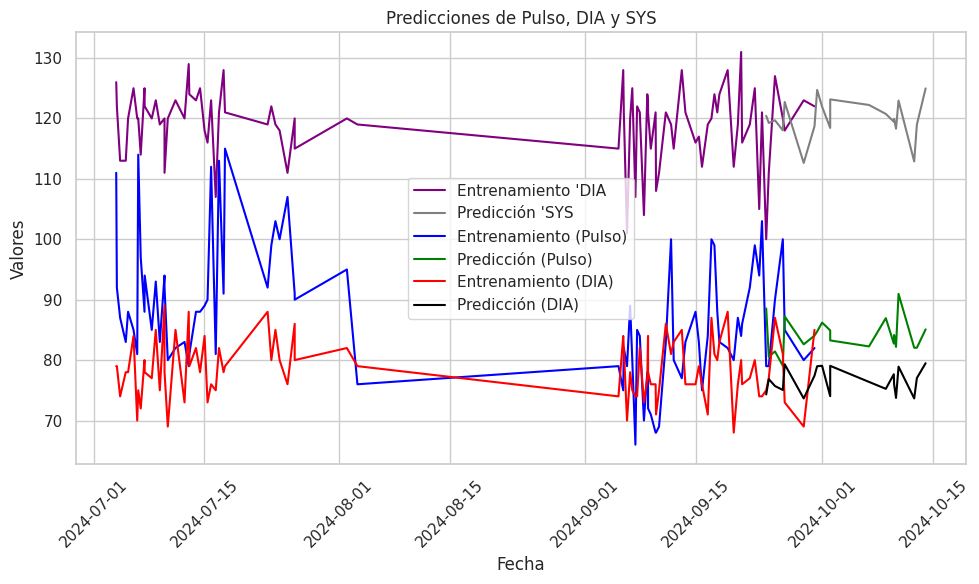

In [54]:
#Grafico en los datos de entrenamiento y pruebas.
plt.figure(figsize=(10, 6))

#Plot for 'SYS'

plt.plot(train_sys, label="Entrenamiento 'DIA", color="purple")
plt.plot(forecast_index_sys, forecast_sys, label="Predicción 'SYS", color="grey")

# Plot for 'Pulso'
plt.plot(train, label="Entrenamiento (Pulso)", color="blue")
plt.plot(forecast_index, forecast, label="Predicción (Pulso)", color="green")

# Plot for 'DIA'
plt.plot(train_dia, label="Entrenamiento (DIA)", color="red")  # Changed color to 'red' for clarity # Changed color to 'purple' for clarity
plt.plot(forecast_index_dia, forecast_dia, label="Predicción (DIA)", color="black") # Changed color to 'black' for clarity


plt.title("Predicciones de Pulso, DIA y SYS")  # Set a title for the combined plot
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()  # Display the legend to distinguish between the datasets
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
train_sys.head()

,SYS
Fecha de medición,
2024-07-03 20:44:00,126
2024-07-03 22:42:00,122
2024-07-04 08:34:00,113
2024-07-05 01:38:00,113
2024-07-05 08:38:00,120


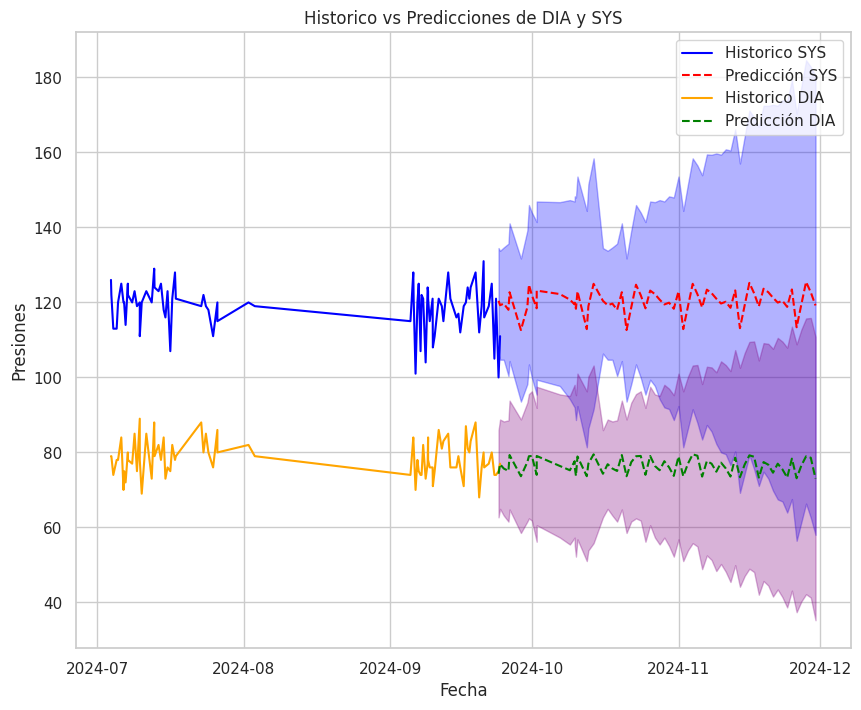

In [56]:
# Grafico de Predicciones DIA Y SYS vs Historico.
plt.figure(figsize=(10,8))

plt.plot(train_sys[:-5], label="Historico SYS", color="blue")
plt.plot(combined_index_sys[:len(combined_forecast_sys)], combined_forecast_sys, label="Predicción SYS", color="red", linestyle = '--')
plt.fill_between(combined_index_sys,
                 combined_conf_int_sys[:len(combined_index_sys),0],
                 combined_conf_int_sys[:len(combined_index_sys), 1],
                 color='blue', alpha=0.3)

plt.plot(train_dia[:-5], label="Historico DIA", color="orange")
plt.plot(combined_index[:len(combined_forecast)], combined_forecast, label="Predicción DIA", color="green", linestyle = '--')

plt.fill_between(combined_index,
                 combined_conf_int[:len(combined_index),0],
                 combined_conf_int[:len(combined_index), 1],
                 color='purple', alpha=0.3)

plt.title("Historico vs Predicciones de DIA y SYS")
plt.xlabel("Fecha")
plt.ylabel("Presiones")
plt.legend()
plt.show()

In [57]:
forecast_noviembre_df.head()

,Fecha,Prediccion_DIA,Prediccion_SYS
85,2024-10-16,74.313548,120.427373
86,2024-10-17,76.860168,119.252610
87,2024-10-18,75.709771,119.686886
88,2024-10-19,75.054748,118.032463
89,2024-10-20,79.305501,122.728150


In [58]:
forecast_noviembre_df.set_index('Fecha', drop=True, inplace=True)

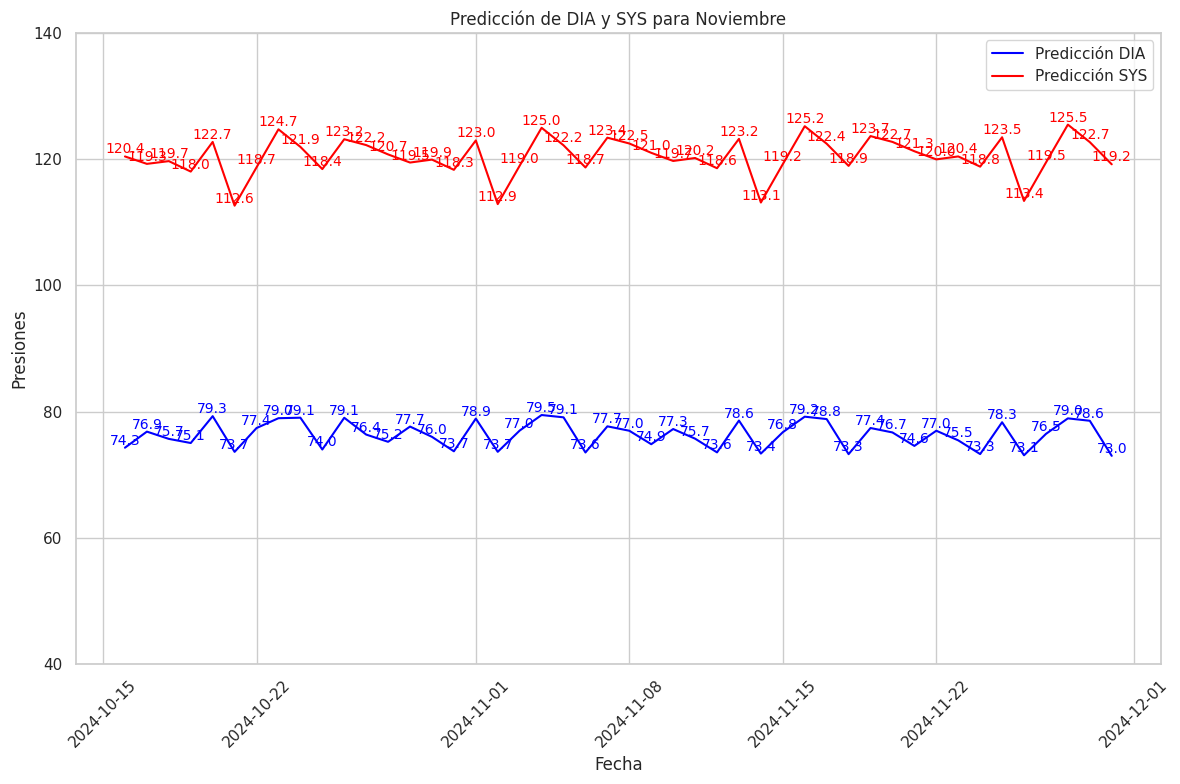

In [59]:
# Añadir valores numéricos sobre los puntos.
plt.figure(figsize=(12, 8))
plt.plot(forecast_noviembre_df['Prediccion_DIA'], label='Predicción DIA', color='blue')

plt.plot(forecast_noviembre_df['Prediccion_SYS'], label='Predicción SYS', color='red')

for i, value in enumerate(forecast_noviembre_df['Prediccion_DIA']):
    plt.text(forecast_noviembre_df.index[i], value, f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='blue')


for i, value in enumerate(forecast_noviembre_df['Prediccion_SYS']):
    plt.text(forecast_noviembre_df.index[i], value, f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel("Fecha")
plt.ylabel("Presiones")
plt.title("Predicción de DIA y SYS para Noviembre")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(40 ,140)
plt.tight_layout()
plt.show()

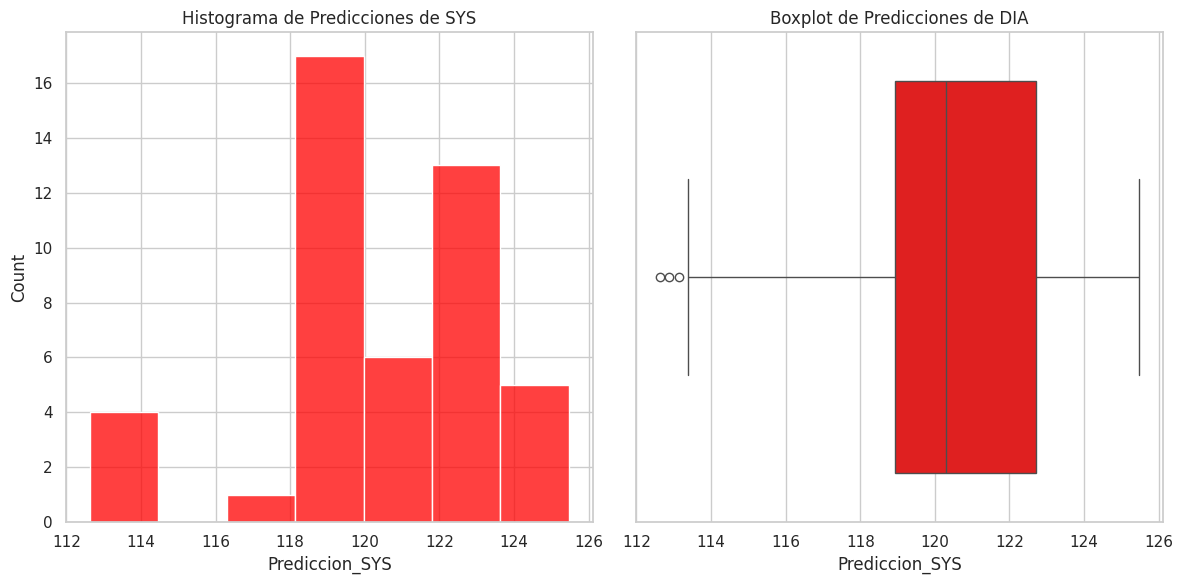

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Prediccion_SYS', data=forecast_noviembre_df, color='red')
plt.title('Histograma de Predicciones de SYS')

plt.subplot(1, 2, 2)
sns.boxplot(x='Prediccion_SYS', data=forecast_noviembre_df, color='red')
plt.title('Boxplot de Predicciones de DIA')

plt.tight_layout()
plt.show()

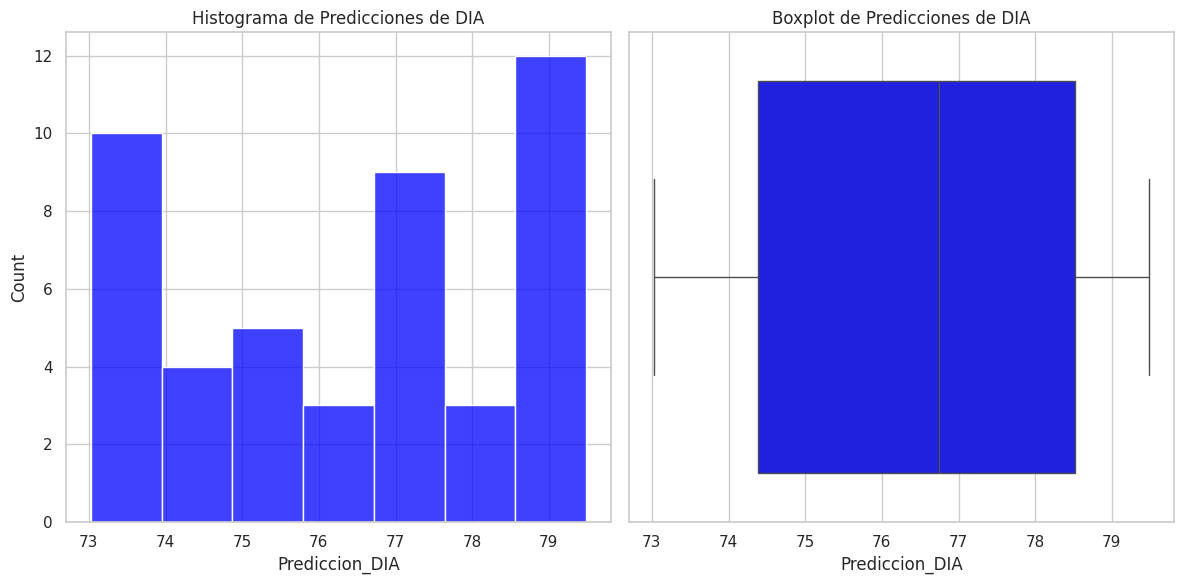

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Prediccion_DIA', data=forecast_noviembre_df, color='blue')
plt.title('Histograma de Predicciones de DIA')

plt.subplot(1, 2, 2)
sns.boxplot(x='Prediccion_DIA', data=forecast_noviembre_df, color='blue')
plt.title('Boxplot de Predicciones de DIA')

plt.tight_layout()
plt.show()